In [1]:
# python -m pip install prophet
# here i will try prophet on the loged data so log(x)

In [2]:
import numpy as np
import pandas as pd
import cufflinks as cf
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
import plotly.express as px
from datetime import datetime,date
from prophet import Prophet

%matplotlib inline
init_notebook_mode(connected=True)
cf.set_config_file(sharing='private',theme='pearl',offline=True)
#print("Cufflinks Version : {}".format(cf.__version__))

# facebook prophet requires the data to be in 2 colums named ds and y
# ds will be a datetime column with no timezone data and y the label we are forecasting
# ds must NOT be an index like other machine learning algorithms
dfActual = pd.read_csv('./data/ETH-USD.csv')
df = pd.read_csv('./data/eth-usd-max.csv')
df.drop(["market_cap", "total_volume"], axis=1, inplace=True)
df['price'].fillna(method='ffill', inplace=True)
df.columns = ['ds','y']
# log data for btc
# df['y'] = np.log(df['y'])
# df['y'].iplot();
dynamic_days = 1550

In [3]:
df['y'].iplot();

In [4]:
df['ds'] = pd.to_datetime(df['ds'])
df['ds'] = df['ds'].dt.tz_localize(None)

In [5]:
df.head()

,ds,y
0,2015-08-07,2.831620
1,2015-08-08,1.330750
2,2015-08-10,0.687586
3,2015-08-11,1.067379
4,2015-08-12,1.256613


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2602 entries, 0 to 2601
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      2602 non-null   datetime64[ns]
 1   y       2602 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 40.8 KB


In [7]:
df['floor'] = 0
df['cap'] = 4900
train = df.iloc[:-dynamic_days]
test = df.iloc[-dynamic_days:]

In [8]:
# This is fitting only on the training data
# now I will include the test data in the training set and forecast 2 months in the future
m = Prophet(weekly_seasonality=False, yearly_seasonality=False, daily_seasonality=False, 
                growth='logistic', seasonality_mode='multiplicative')
m.add_seasonality(name='4-year', period=1400, fourier_order=10)
m.fit(train)
# just a placeholder to hold our future predictions
# periods is how far in the future we want to predict and freq is the frequency of the data
# if we want monthly data then freq='MS'
future = m.make_future_dataframe(periods=dynamic_days,freq = 'D')
future['cap'] = 4900
future['floor'] = 0
# to make predictions 
forecast = m.predict(future)

C:\Users\sagap\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\sagap\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\sagap\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [9]:
forecast

,ds,trend,cap,floor,yhat_lower,yhat_upper,trend_lower,trend_upper,4-year,4-year_lower,4-year_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2015-08-07,1.276009,4900,0,-67.921056,63.571179,1.276009,1.276009,-0.752851,-0.752851,-0.752851,-0.752851,-0.752851,-0.752851,0.0,0.0,0.0,0.315364
1,2015-08-08,1.285864,4900,0,-64.826851,64.241493,1.285864,1.285864,-0.874355,-0.874355,-0.874355,-0.874355,-0.874355,-0.874355,0.0,0.0,0.0,0.161563
2,2015-08-10,1.305805,4900,0,-65.956587,66.036928,1.305805,1.305805,-1.108596,-1.108596,-1.108596,-1.108596,-1.108596,-1.108596,0.0,0.0,0.0,-0.141806
3,2015-08-11,1.315891,4900,0,-64.154937,71.758088,1.315891,1.315891,-1.221061,-1.221061,-1.221061,-1.221061,-1.221061,-1.221061,0.0,0.0,0.0,-0.290892
4,2015-08-12,1.326054,4900,0,-71.228472,66.730264,1.326054,1.326054,-1.330250,-1.330250,-1.330250,-1.330250,-1.330250,-1.330250,0.0,0.0,0.0,-0.437930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2597,2022-09-17,4899.961024,4900,0,23620.600350,23747.265688,4899.961024,4899.961024,3.834401,3.834401,3.834401,3.834401,3.834401,3.834401,0.0,0.0,0.0,23688.377919
2598,2022-09-18,4899.961323,4900,0,22508.137405,22634.120443,4899.961323,4899.961323,3.606376,3.606376,3.606376,3.606376,3.606376,3.606376,0.0,0.0,0.0,22571.062036
2599,2022-09-19,4899.961619,4900,0,21374.272823,21499.180541,4899.961619,4899.961619,3.375013,3.375013,3.375013,3.375013,3.375013,3.375013,0.0,0.0,0.0,21437.394490
2600,2022-09-20,4899.961914,4900,0,20217.645761,20346.399822,4899.961914,4899.961914,3.140543,3.140543,3.140543,3.140543,3.140543,3.140543,0.0,0.0,0.0,20288.501604


<AxesSubplot:xlabel='ds'>

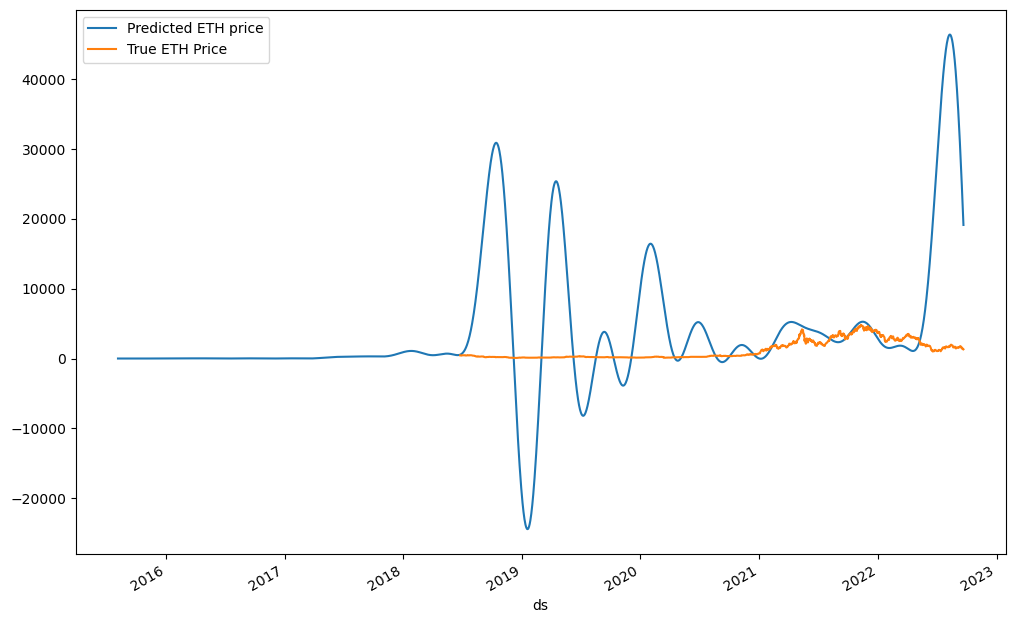

In [10]:
ax = forecast.plot(x='ds',y='yhat',label='Predicted ETH price',legend=True,figsize=(12,8))
test.plot(x='ds',y='y',label='True ETH Price',legend=True,ax=ax)

In [11]:
from statsmodels.tools.eval_measures import rmse

In [12]:
predictions = forecast.iloc[-dynamic_days:]['yhat']

In [13]:
rmse(predictions,test['y'])

12928.42173546239

In [14]:
# very large difference as it is roughly as equal half of the mean
test.mean()

C:\Users\sagap\AppData\Local\Temp\ipykernel_22856\3796774242.py:2: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



y        1184.92105
floor       0.00000
cap      4900.00000
dtype: float64

In [15]:
# prophet has its own diagnostics. we need to define just as done below initial, period and horizon
from prophet.diagnostics import cross_validation,performance_metrics
from prophet.plot import plot_cross_validation_metric

In [16]:
# Initial 5 years training period
initial = 5 * 365
initial = str(initial) + ' days'
# Fold every 1 years
period = 1 * 365
period = str(period) + ' days'
# Forecast 1 year into the future
horizon = 365
horizon = str(horizon) + ' days'

In [17]:
#df_cv = cross_validation(m, initial=initial, period=period, horizon = horizon)

In [18]:
# thgis is the raw dataset that is returned via the above
#performance_metrics(df_cv)

In [19]:
# we can plt a specific metric of the above which shows that mse increases over time so up to 50 days we are ok
# more than that rmse increases a lot
#plot_cross_validation_metric(df_cv, metric='rmse');

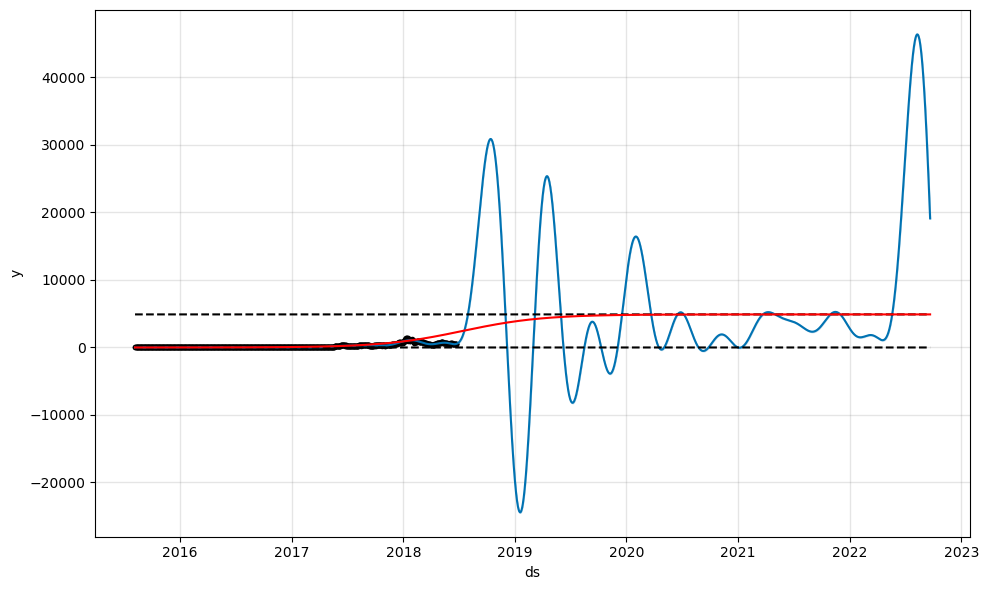

In [20]:
# to see the trend change points
from prophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

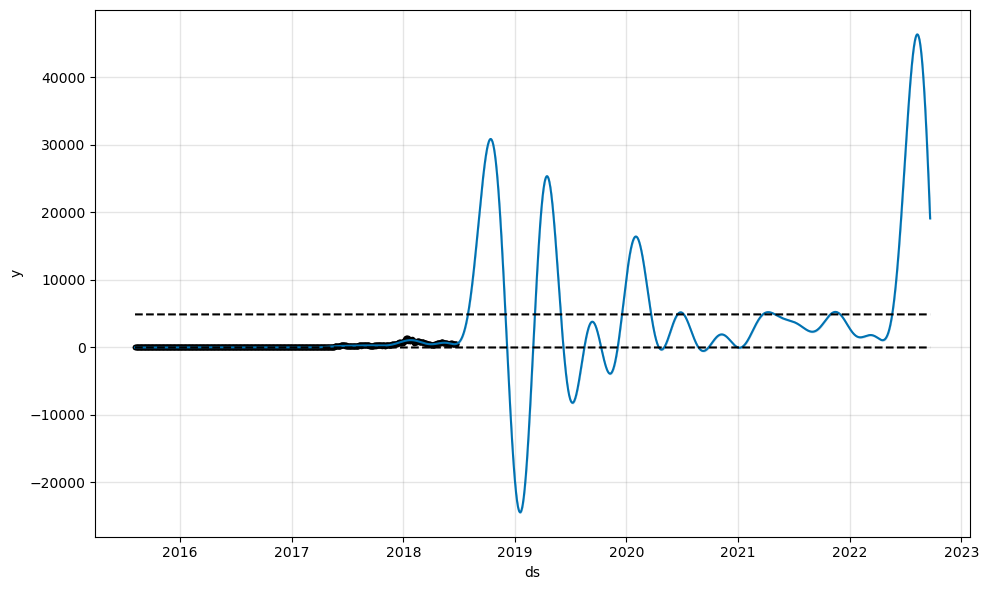

In [21]:
# we can use prophets own tools for plotting and analysis
import matplotlib.pyplot as plt
m.plot(forecast);
# plt.xlim('2014-01-01','2022-01-01') # we can use xlim to limit the data being plotted

In [22]:
# now I will include the test data in the training set and forecast 2 months in the future

m = Prophet(weekly_seasonality=False, yearly_seasonality=False, daily_seasonality=False, 
                growth='logistic', seasonality_mode='multiplicative')
m.add_seasonality(name='4-year', period=1400, fourier_order=10)
m.fit(df)
# just a placeholder to hold our future predictions
# periods is how far in the future we want to predict and freq is the frequency of the data
# if we want monthly data then freq='MS'
future = m.make_future_dataframe(periods=dynamic_days,freq = 'D')
future['cap'] = 4900
future['floor'] = 0
# to make predictions 
forecast = m.predict(future)


C:\Users\sagap\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\sagap\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\sagap\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



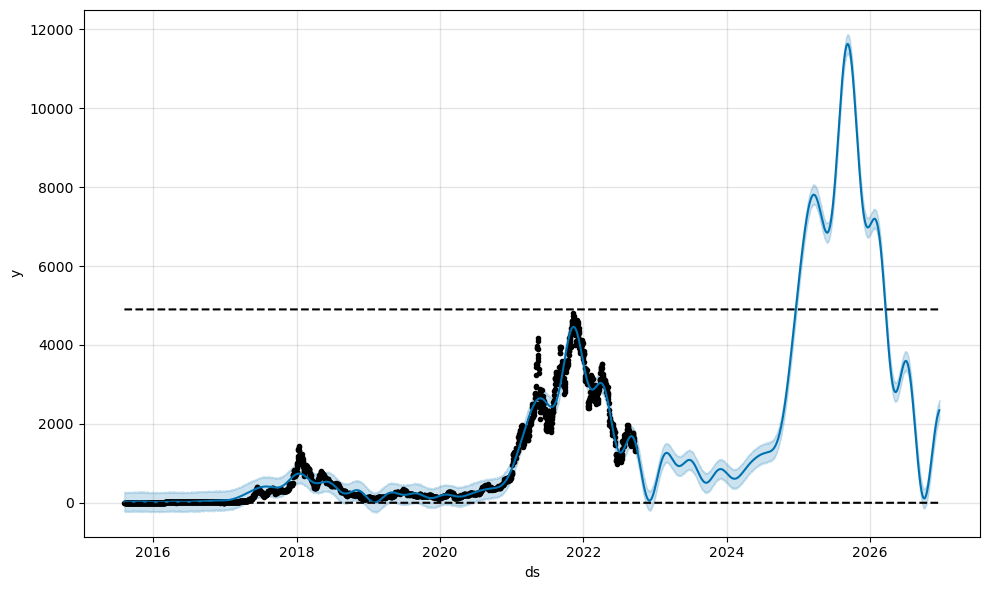

In [23]:
fig = m.plot(forecast)

C:\Users\sagap\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



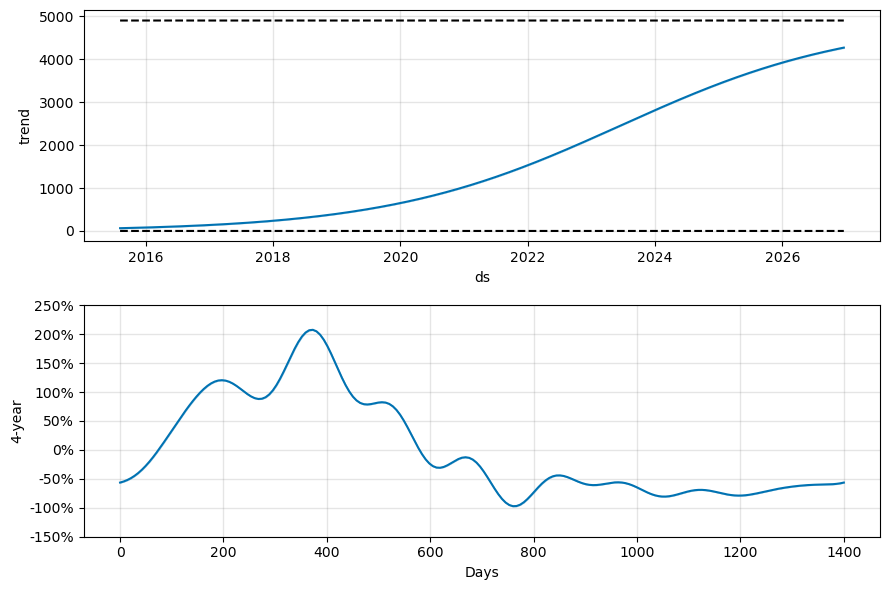

In [24]:
fig = m.plot_components(forecast)

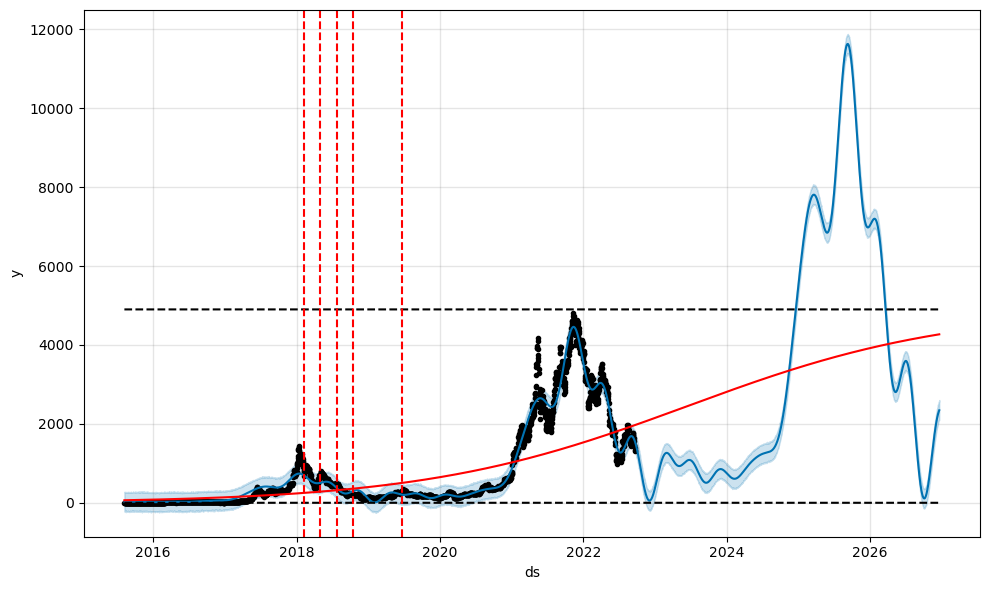

In [25]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [26]:
# final plot but with plotly
forecastPlotly = forecast.copy()
forecastPlotly['date'] = pd.to_datetime(forecastPlotly['ds'])
forecastPlotly = forecastPlotly.set_index('date')
forecastPlotly = forecastPlotly.drop(['ds'], axis=1)
forecastPlotly[['yhat_lower','yhat_upper', 'yhat']].iplot()

In [27]:
dfActual['date'] = pd.to_datetime(dfActual['Date'])
dfActual = dfActual.set_index('date')
dfActual = dfActual.drop(['Date'], axis=1)
result = forecastPlotly.join(dfActual, how='outer')

In [28]:
result[['yhat', 'Close']].iplot()